In [1]:
class Variable():
    def __init__(self, x, born_fn=None, reqires_grad=True):
        self.x = x
        self.born_fn = born_fn
        self.grad = 0
        self.reqires_grad =reqires_grad
    def backward(self, grad=1):
        if not self.reqires_grad:
            return 
        self.grad += grad
        if self.born_fn is not None:
            self.born_fn.backward(grad)

    def __str__(self):
        return "Variable( x="+str(self.x)[:7] + " requires_grad=" + str(self.reqires_grad) + " grad=" + str(self.grad)[:7] + " born_fn=" + str(self.born_fn) +" )"
    def __repr__(self):
        return self.__str__()

    def __add__(self, other):     return VariableAdd().forward(self, other)
    def __sub__(self, other):     return VariableSub().forward(self, other)
    def __mul__(self, other):     return VariableMul().forward(self, other)    
    def __truediv__(self, other): return VariableDiv().forward(self, other)

class VariableBase():
    def transform(self, x):
        if not isinstance(x, Variable):
            return Variable(x)
        return x

class VariableAdd(VariableBase):
    def forward(self, a, b):
        self.a, self.b = self.transform(a), self.transform(b)
        rez = self.a.x + self.b.x
        reqires_grad = self.a.reqires_grad or self.b.reqires_grad
        return Variable(rez, born_fn=self, reqires_grad=reqires_grad)
    def backward(self, grad=1):
        self.a.backward(grad=grad)
        self.b.backward(grad=grad)

class VariableSub(VariableBase):
    def forward(self, a, b):
        self.a, self.b = self.transform(a), self.transform(b)
        rez = self.a.x - self.b.x
        reqires_grad = self.a.reqires_grad or self.b.reqires_grad
        return Variable(rez, born_fn=self, reqires_grad=reqires_grad)
    def backward(self, grad=1):
        self.a.backward(grad=grad)
        self.b.backward(grad=-grad)

class VariableMul(VariableBase):
    def forward(self, a, b):
        self.a, self.b = self.transform(a), self.transform(b)
        rez = self.a.x * self.b.x
        reqires_grad = self.a.reqires_grad or self.b.reqires_grad
        return Variable(rez, born_fn=self, reqires_grad=reqires_grad)
    def backward(self, grad=1):
        self.a.backward(grad=grad*self.b.x)
        self.b.backward(grad=grad*self.a.x)

class VariableDiv(VariableBase):
    def forward(self, a, b):
        self.a, self.b = self.transform(a), self.transform(b)
        rez = self.a.x / self.b.x
        reqires_grad = self.a.reqires_grad or self.b.reqires_grad
        return Variable(rez, born_fn=self, reqires_grad=reqires_grad)
    def backward(self, grad=1):
        self.a.backward(grad=grad/self.b.x)
        self.b.backward(grad=-grad*self.a.x/(self.b.x**2))



In [2]:
a = Variable(3)
b = Variable(8)
c = Variable(19)
rez = b*2
rez.backward()
a.grad, b.grad, c.grad

(0, 2, 0)

In [13]:
lr = 0.1
x = Variable(10)
losses = []
x_values = []

def func_to_optimize(x):
    return (x-34)*(x-8)

for i in range(100):
    rez = func_to_optimize(x)
    rez.backward()
    x.x -= lr*x.grad
    losses.append(rez.x)
    x_values.append(x.x)
    x.grad = 0
x

Variable( x=20.9999 requires_grad=True grad=0 born_fn=None )

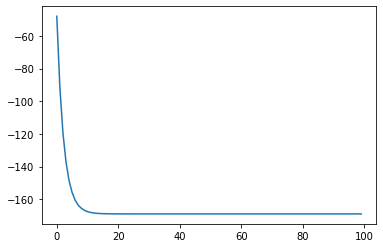

In [12]:
import matplotlib.pyplot as plt 
plt.plot(losses)

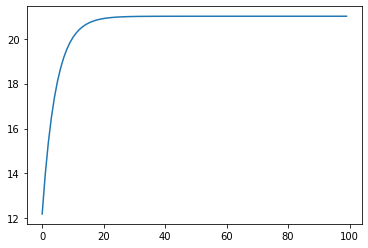

In [14]:
plt.plot(x_values)